# Self-Driving Car Engineer Nanodegree


## Project: **Behavioral Cloning** 
### **Adam Tetelman**
***
In this project I used the tools that were taught througout the "Keras" and "Transfer Learning" lessons as well as previous materials.

The project relies on the following packages:
 - python3 (and standard libraries)
 - numpy (for array manipulation)
 - Keras (as a wrapper around Tensorflow)  
 - Tensorflow (For CNN definitions and pre-processing)

The tools taught included:
- CNNs
- Data Augmentation
- Keras/Tensorflow
- Transfer Learning
- Network Tuning/Hypertuning

The resources used included:
- Driving Simulator (provided by Udacity to record train data/test model)
- ./data (data recoded using the simulator)
- ./models (models trained throughout the tuning process)
- ./logs (tuning logs, plots, and data files)

The goal of this project was to design and train a Convolutional Neural Network that autonomously steers a simulated car in real-time. 

To accomplish this goal I broke the problem down into 3 main sections, training data selection, model definition, and parameter tuning/hypertuning.

I collected various datasets using various formats and techniques. I ran several controlled experiments to see which data did best; to judge I used both the validation data loss score, as well as the a human judgement of the model driving.

I ran multiple models against the chosen datasets. Various models had differing kernel sizes, number of convolutions, activations fuctions, optimizers, etc. I judged these models by their loss score, along with a human judgement of the model driving.

Finally I ran the several models against various parameter settings. I toggled cropping size, grayscale conversion, rgb to yuv conversion, image resizing settings, horizontal/vertical flipping data augmentation, batch size, epoch count, Left/Right/Center image use, Left/Right/Center correction values, etc. I judged these parameters by their loss score, along with a human judgement of the driving.

I ran these expirements in a controlled way, such that each training session was identical and they can all be repeated by running the `behavioral_cloning_hypertuning.py` script. The logs and models from each run are included in the logs and models directory along with a descriptions of notable autonomous driving videos.

## Simulator Data Description

During the training mode of the simulator a left camera, right camera, and center camera image is captured during each interval. Along with these image filenames the speed and current steering angle are also recored in csv format.

The simulator has two tracks. A simple track that is a basic loop and a more complex jungle track.

I created dataset `t1`, which was simply me driving the best and fast I could around the track. There are moments when I cross the lines a little and correct and a few moments where I take turns to sharp. This data is what you'd expect to see from someone playing a driving game for the first time holding down the gas. Similarly I created `t2` for track 2. It should be complete enough that a autonomous vehicle that goes awry should have some idea on how to self-correct.

I created dataset `t1-rev` which was recorded in the same fashion as `t1` driving the opposing direction. This was an effort to reduce overfitting.

I created dataset `t1-cautious` which was me recording "perfect" data where I very slowly and meticulously drove around the track keeping it very centered.

`test-data` is the data provided by Udacity for track 1.

Based on some of the choppy results I saw and some online discussions I participated in on the forums I recorded more datasets similar to `t1`. `good-big-t1` is a rather long recording using a higher video quality. `mouse-t1` is a higher quality video quality also using mouse controls for turning rather than wasd (these numbers provide more smoother turns).

In order to judge which of these datasets ran best, I ran my hypterune script against various collections of the datasets to see which provided best results.

For most of the training process I used 80% of the data for training and 20% of the data for validation. Rather than save off a test data-set; I used a visual demonstration of the car driving on track 1 and track 2 as the test. Track 2 is a "pure" test set, as I did not run any models against it until I was done tuning.

I did my best to provide a less-than-perfect training set to simulate the real-world problem where unimited perfect data is not available.

## Transfer Learning & Initial Model

For my initial model design I chose to use previous research rather than starting from scratch.

Nvidia had previously spent a lot of time and money researching deep learning techniques to solve a very similar problem. Their approach and model is define in this paper http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf.

All of my models are defined in the `behavioral_cloning_models.py` script.

I started with the exact model as defined by Nvidia (using RGB in place of YUV input). 

I then created several different models utilizing different activation functions at different layers. I thought that because there is no "correct" direction to drive when driving in a straight line, that a Leaky ReLU activation may behave better than a regular ReLU, so I added that to my `nvidia_lrelu` model.

Similarly I tried adding/removing Dropout Layers, Dense layers, and Convolutional layers.

I also tried playing around with a few different optimizers, learning rates, and optimizer settings. In the end the default Adam optimizer gave some of the best results and was the chosen optimizer.


##  Data Pre-Processing, Augmentation, & Parameter Tuning

I created a large loop that would try various combinations of the different parameters and tuning options listed below.

**Data Augmentation**
- Add Horizontally flipped images to the dataset
- Add Vertically flipped images to the dataset

**Data Pre-Processing**
- Convert Images to YUV (format used by Nvidia)
- Convert Images to grayscale
- Normalize Images
- Crop Images (no, various sizes)
- Resize Images (various sizes)
- Blur Images (yes/no)

**Parameter Tuning**
- Batch Size
- Epoch Size
- Images Use (center only or left/right/center)
- Left/Right Correction values (None, various values)


## Code Organization


**behavioral_cloning.py**

This script contains the bulk of the code. 

I have several functions defined that properly construct filenames, parse CSV files, read/write pickle files, save/plot history results, and read in all of the data.

This is also where I defined data generators used during training (`read_data_generator()`), and the functions used to split the dataset into train, validation, and test (`split_data_lines()`).

I have also defined several functions to handle pre-processing, such as normalziation, grayscale conversion, blurring, etc, which are all wrapped by `add_model_preprocess()`.

Similarly there are functions for data augmentation.

The largest block of code is in `train_save_eval_model` which is responsible for taking a `model` and `args` object, creating data generators, configuring the model, training the model, saving results, printing some useful info, and scoring the test/validation data.

Lastly, there are a few functions that define the default `args` object and handles some argument parsing. I structured my code in this way so that as I progressed in experimenting with more models and parameters that I could add more more parameters to modify without breaking any previously run experiments. It also pretty prints everything to the screen for easier use. 

Everything pertaining to the model structure is contained in the `model` and all tuning/hypertuning/pre-processing paremeters, file names, and other options are stored in the `args` object. 

**behavioral_cloning_models**

This is where all the models are defined.

This script contains a `get_model()` function that will return a properly configured model given an `args` object and the model name.

This script also contains several functions that will return a specific model.

I configured this script in this way so that each model configuration I tested had a unique name and was saved to file and reproducable. Note that the pre-processing stages are considered "tunable" and are in the `behavioral_cloning.py` script not the models script.

**behavioral_cloning_training.py**

This script can be run via the command line or called by an external python module.

This script parses command line or args options and then makes properly library calls to parse options, pre-process data, create a model, train the model, validate the model, and save/plot the results.

**behavioral_cloning_hypertuning.py**

This script has a `hypertune_model` function that takes a model and a dataset and trains/tests the model with various combinations of parameters.

The details of this script are described below, but it essentially runs `hypertune_model` for each recorded dataset and against each model. It is able to do this because the time required to adequately train the model allows for a large number of combinations (~15 models an hour)




## Initial Experiments

First We import a few python modules, notably the hypertuning script `behavioral_cloning_hypertuning` as bch.

In [1]:
%matplotlib inline

import os

import matplotlib
import numpy as np
np.random.seed(9632) # We need to seed Numpy before importing Keras for reproducibility.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import HTML

import behavioral_cloning_hypertuning as bch

Using TensorFlow backend.


### Collecting Initial Data
As described above, I collected data on multiple models and multiple parameters. Each of the the calls to `hypertune_model()` trains the model against 48 different combinations of parameters. The results are saved to a pickle file which we will explore later.

Because running these commands took roughly a day with a large amount of output I have commented the lines out in the notebook and instead will explore the results in the plots and data below.

In [2]:
# bch.hypertune_model("nvidia_model.p", "nvidia")
# bch.hypertune_model("nvidia_lrelu.p", "nvidia_lrelu", False)
# bch.hypertune_model("nvidia_conv_relu.p", "nvidia_conv_relu", False)
# bch.hypertune_model("nvidia_relu.p", "nvidia_relu", False)
# bch.hypertune_model("nvidia_relu_nadam_model.p", "nvidia_relu_nadam_model", False)
# bch.hypertune_model("nvidia_conv_dropout_mouse.p", "nvidia_conv_dropout.p", False)

In [3]:
results_files = [] # Store a list of results files for exploration

### Exploring The Train/Validation Loss History
For each training run I saved off the training and validation loss per epoch. Plots of that data are shown below for each model and each parameter configuration. This is a lot of data so we will summarize it in a few blocks.

In [4]:
# history_dir = os.path.join("logs", "hypertune-nvidia_model")
# results_pickle_file = os.path.join(history_dir, "nvidia_model.p")
# results_files.append(results_pickle_file) # Add this file to the list of results files
# bch.plot_run_files(results_pickle_file, history_dir)

Found multiple result files for nvidia_lrelu-2.h5, taking the first
Found multiple result files for nvidia_lrelu-4.h5, taking the first
Found multiple result files for nvidia_lrelu-1.h5, taking the first
Found multiple result files for nvidia_lrelu-3.h5, taking the first


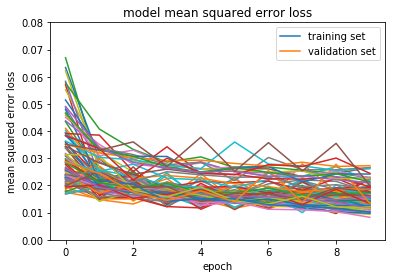

In [5]:
history_dir = os.path.join("logs", "nvidia_lrelu")
results_pickle_file = os.path.join(history_dir, "nvidia_lrelu.p")
results_files.append(results_pickle_file) # Add this file to the list of results files
bch.plot_run_files(results_pickle_file, history_dir)

Found multiple result files for nvidia_relu-4.h5, taking the first
Found multiple result files for nvidia_relu-2.h5, taking the first
Found multiple result files for nvidia_relu-1.h5, taking the first
Found multiple result files for nvidia_relu-3.h5, taking the first


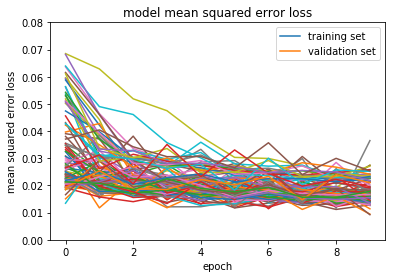

In [6]:
history_dir = os.path.join("logs", "nvidia_relu")
results_pickle_file = os.path.join(history_dir, "nvidia_relu.p")
results_files.append(results_pickle_file) # Add this file to the list of results files
bch.plot_run_files(results_pickle_file, history_dir)

Found multiple result files for nvidia_relu_nadam_model-4.h5, taking the first
Found multiple result files for nvidia_relu_nadam_model-1.h5, taking the first
Found multiple result files for nvidia_relu_nadam_model-3.h5, taking the first
Found multiple result files for nvidia_relu_nadam_model-2.h5, taking the first


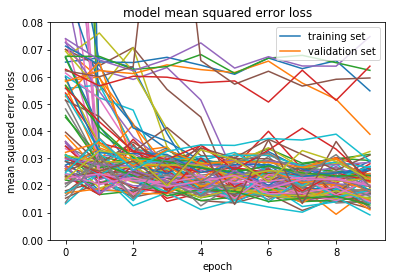

In [7]:
history_dir = os.path.join("logs", "nvidia_relu_nadam")
results_pickle_file = os.path.join(history_dir, "nvidia_relu_nadam_model.p")
results_files.append(results_pickle_file) # Add this file to the list of results files
bch.plot_run_files(results_pickle_file, history_dir)

Found multiple result files for nvidia_conv_relu-1.h5, taking the first
Found multiple result files for nvidia_conv_relu-4.h5, taking the first
Found multiple result files for nvidia_conv_relu-3.h5, taking the first
Found multiple result files for nvidia_conv_relu-2.h5, taking the first


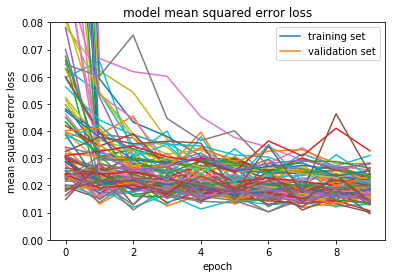

In [8]:
history_dir = os.path.join("logs", "nvidia_conv_relu")
results_pickle_file = os.path.join(history_dir, "nvidia_conv_relu.p")
results_files.append(results_pickle_file) # Add this file to the list of results files
bch.plot_run_files(results_pickle_file, history_dir)

Found multiple result files for nvidia_conv_dropout-1.h5, taking the first
Found multiple result files for nvidia_conv_dropout-2.h5, taking the first
Found multiple result files for nvidia_conv_dropout-4.h5, taking the first
Found multiple result files for nvidia_conv_dropout-3.h5, taking the first


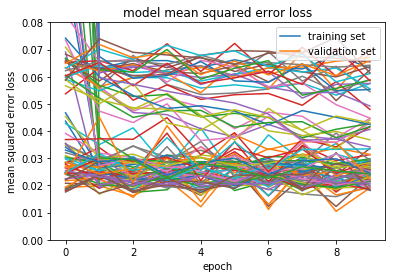

In [9]:
history_dir = os.path.join("logs", "nvidia_conv_dropout")
results_pickle_file = os.path.join(history_dir, "nvidia_conv_dropout.p")
results_files.append(results_pickle_file) # Add this file to the list of results files
bch.plot_run_files(results_pickle_file, history_dir)

### Again With Different Data

I run the same training/analysis on a new training set.

It is worth noting again that this training ran in a reasonable time frame which is the only reason I ran against so many model configurations. In a larger training scenario this would have been a good point to start weeding out parameters and models that were not worth investigating further.

In [10]:
# bch.hypertune_model("nvidia_model_mouse.p", "nvidia", False, False, csv_file_names = ["mouse-t1.csv"])
# bch.hypertune_model("nvidia_lrelu_mouse.p", "nvidia_lrelu", False, False, csv_file_names = ["mouse-t1.csv"])
# bch.hypertune_model("nvidia_conv_relu_mouse.p", "nvidia_conv_relu", False, False, csv_file_names = ["mouse-t1.csv"])
# bch.hypertune_model("nvidia_relu_mouse.p", "nvidia_relu", False, False, csv_file_names = ["mouse-t1.csv"])
# bch.hypertune_model("nvidia_relu_nadam_model_mouse.p", "nvidia_relu_nadam_model", False, False, csv_file_names = ["mouse-t1.csv"])
# bch.hypertune_model("nvidia_conv_dropout_mouse.p", "nvidia_conv_dropout_mouse.p", False, False, csv_file_names = ["mouse-t1.csv"])


In [11]:
results_files2 = [] # Store a list of results files for exploration

Found multiple result files for nvidia-1.h5, taking the first
Found multiple result files for nvidia-2.h5, taking the first
Found multiple result files for nvidia-4.h5, taking the first
Found multiple result files for nvidia-3.h5, taking the first


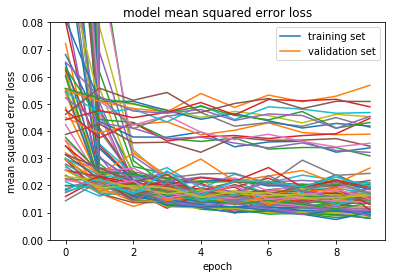

In [12]:
history_dir = os.path.join("logs", "nvidia_model_mouse")
results_pickle_file = os.path.join(history_dir, "nvidia_model_mouse.p")
results_files2.append(results_pickle_file) # Add this file to the list of results files
bch.plot_run_files(results_pickle_file, history_dir)

Found multiple result files for nvidia_lrelu-4.h5, taking the first
Found multiple result files for nvidia_lrelu-2.h5, taking the first
Found multiple result files for nvidia_lrelu-1.h5, taking the first
Found multiple result files for nvidia_lrelu-3.h5, taking the first


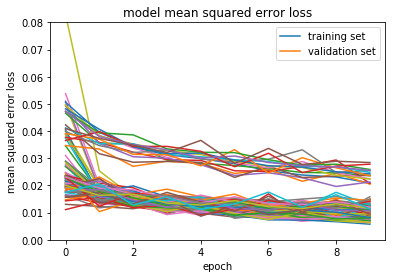

In [13]:
history_dir = os.path.join("logs", "nvidia_lrelu_mouse")
results_pickle_file = os.path.join(history_dir, "nvidia_lrelu_mouse.p")
results_files2.append(results_pickle_file) # Add this file to the list of results files
bch.plot_run_files(results_pickle_file, history_dir)

Found multiple result files for nvidia_conv_relu-4.h5, taking the first
Found multiple result files for nvidia_conv_relu-1.h5, taking the first
Found multiple result files for nvidia_conv_relu-2.h5, taking the first
Found multiple result files for nvidia_conv_relu-3.h5, taking the first


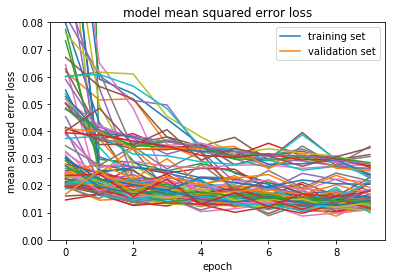

In [14]:
history_dir = os.path.join("logs", "nvidia_conv_relu_mouse")
results_pickle_file = os.path.join(history_dir, "nvidia_conv_relu_mouse.p")
results_files2.append(results_pickle_file) # Add this file to the list of results files
bch.plot_run_files(results_pickle_file, history_dir)

Found multiple result files for nvidia_relu-4.h5, taking the first
Found multiple result files for nvidia_relu-1.h5, taking the first
Found multiple result files for nvidia_relu-2.h5, taking the first
Found multiple result files for nvidia_relu-3.h5, taking the first


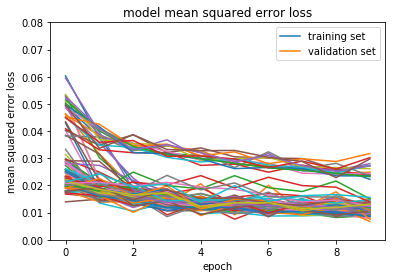

In [15]:
history_dir = os.path.join("logs","nvidia_relu_mouse")
results_pickle_file = os.path.join(history_dir, "nvidia_relu_mouse.p")
results_files2.append(results_pickle_file) # Add this file to the list of results files
bch.plot_run_files(results_pickle_file, history_dir)

Found multiple result files for nvidia_relu_nadam_model-1.h5, taking the first
Found multiple result files for nvidia_relu_nadam_model-2.h5, taking the first
Found multiple result files for nvidia_relu_nadam_model-4.h5, taking the first
Found multiple result files for nvidia_relu_nadam_model-3.h5, taking the first


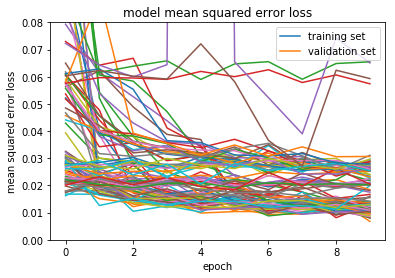

In [16]:
history_dir = os.path.join("logs", "nvidia_relu_nadam_model_mouse")
results_pickle_file = os.path.join(history_dir, "nvidia_relu_nadam_model_mouse.p")
results_files2.append(results_pickle_file) # Add this file to the list of results files
bch.plot_run_files(results_pickle_file, history_dir)

Found multiple result files for nvidia_conv_dropout-2.h5, taking the first
Found multiple result files for nvidia_conv_dropout-4.h5, taking the first
Found multiple result files for nvidia_conv_dropout-1.h5, taking the first
Found multiple result files for nvidia_conv_dropout-3.h5, taking the first


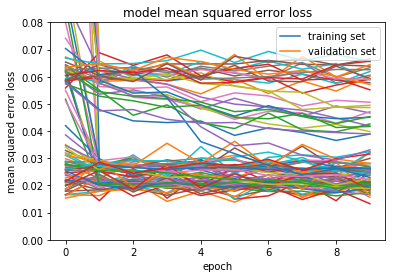

In [17]:
history_dir = os.path.join("logs", "nvidia_conv_dropout_mouse")
results_pickle_file = os.path.join(history_dir, "nvidia_conv_dropout_mouse.p")
results_files2.append(results_pickle_file) # Add this file to the list of results files
bch.plot_run_files(results_pickle_file, history_dir)

### Summarize Those Results

I don't really expect anyone to want to read through 300+ plots and gain any meaningful details outside of basic trends.

Below I will take a look at the top 5 runs overall and from each data set. I then verify that not only did these runs give the best results, but they also provided stable training (smooth downward curve for train and validation data in plots). Lastly I took a look at the actual driving output of the top three videos to verify they were functional.

In [18]:
results1 = bch.display_sorted_results(results_files) # sorted results from first round
results2 = bch.display_sorted_results(results_files2) # sorted results from second round
all_results = bch.display_sorted_results(results_files + results_files2) # sorted results from all rounds

Parsing logs\nvidia_lrelu\nvidia_lrelu.p with 48 entries
Parsing logs\nvidia_relu\nvidia_relu.p with 48 entries
Parsing logs\nvidia_relu_nadam\nvidia_relu_nadam_model.p with 48 entries
Parsing logs\nvidia_conv_relu\nvidia_conv_relu.p with 48 entries
Parsing logs\nvidia_conv_dropout\nvidia_conv_dropout.p with 48 entries
Parsing logs\nvidia_model_mouse\nvidia_model_mouse.p with 48 entries
Parsing logs\nvidia_lrelu_mouse\nvidia_lrelu_mouse.p with 48 entries
Parsing logs\nvidia_conv_relu_mouse\nvidia_conv_relu_mouse.p with 48 entries
Parsing logs\nvidia_relu_mouse\nvidia_relu_mouse.p with 48 entries
Parsing logs\nvidia_relu_nadam_model_mouse\nvidia_relu_nadam_model_mouse.p with 48 entries
Parsing logs\nvidia_conv_dropout_mouse\nvidia_conv_dropout_mouse.p with 48 entries
Parsing logs\nvidia_lrelu\nvidia_lrelu.p with 48 entries
Parsing logs\nvidia_relu\nvidia_relu.p with 48 entries
Parsing logs\nvidia_relu_nadam\nvidia_relu_nadam_model.p with 48 entries
Parsing logs\nvidia_conv_relu\nvidia_c

In [19]:
print(results1[0:5])

[(0.0092389772646129138, 0.27968749999999998, 30, {'all_images': True, 'resize_shape': (200, 66), 'csv_file_names': ['t1.csv', 't1-rev.csv'], 'model': 'nvidia_relu_nadam_model', 'gray': True, 'epochs': 10, 'yuv': False, 'validation': 0.2, 'preprocess': {'yuv': False, 'blur': (3, 3)}, 'nohorizontal': True, 'eval_validation': True, 'crop': False, 'batch': 128, 'show_history': False, 'correction': [0, 0.25, -0.25], 'resize': False, 'data_csv_list': ['data\\csv\\t1.csv', 'data\\csv\\t1-rev.csv'], 'output': 'nvidia_relu_nadam_model-30.h5', 'novertical': True, 'eval_test': False, 'yub': False, 'save_history': True, 'blur': False, 'blur_kernel': (3, 3), 'crop_size': (70, 25), 'nonormalize': False, 'test': 0.001, 'debug': False, 'img_shape': (160, 320, 3)}), (0.011428513750433921, 0.82656249999999998, 46, {'all_images': True, 'resize_shape': (200, 66), 'csv_file_names': ['t1.csv', 't1-rev.csv'], 'model': 'nvidia_relu', 'gray': True, 'epochs': 10, 'yuv': False, 'validation': 0.2, 'preprocess': 

In [20]:
print(results2[0:5])

[(0.0070727524081511161, 0.005580357142857143, 33, {'all_images': True, 'model': 'nvidia_relu_nadam_model', 'csv_file_names': ['mouse-t1.csv'], 'resize_shape': (200, 66), 'gray': False, 'epochs': 10, 'yuv': False, 'validation': 0.2, 'preprocess': {'yuv': False, 'blur': (3, 3)}, 'save_history': True, 'eval_validation': True, 'crop': False, 'batch': 128, 'show_history': False, 'correction': [0, 0.25, -0.25], 'resize': False, 'data_csv_list': ['data\\csv\\mouse-t1.csv'], 'output': 'nvidia_relu_nadam_model-33.h5', 'eval_test': False, 'novertical': True, 'yub': False, 'nohorizontal': True, 'blur': True, 'blur_kernel': (3, 3), 'crop_size': (70, 25), 'nonormalize': False, 'test': 0.001, 'debug': False, 'img_shape': (160, 320, 3)}), (0.0076080313218491414, 0.005580357142857143, 41, {'all_images': True, 'model': 'nvidia_relu', 'csv_file_names': ['mouse-t1.csv'], 'resize_shape': (200, 66), 'gray': True, 'epochs': 10, 'yuv': False, 'validation': 0.2, 'preprocess': {'yuv': False, 'blur': (3, 3)}, 

In [21]:
print(all_results[0:5])

[(0.0070727524081511161, 0.005580357142857143, 33, {'all_images': True, 'model': 'nvidia_relu_nadam_model', 'csv_file_names': ['mouse-t1.csv'], 'resize_shape': (200, 66), 'gray': False, 'epochs': 10, 'yuv': False, 'validation': 0.2, 'preprocess': {'yuv': False, 'blur': (3, 3)}, 'save_history': True, 'eval_validation': True, 'crop': False, 'batch': 128, 'show_history': False, 'correction': [0, 0.25, -0.25], 'resize': False, 'data_csv_list': ['data\\csv\\mouse-t1.csv'], 'output': 'nvidia_relu_nadam_model-33.h5', 'eval_test': False, 'novertical': True, 'yub': False, 'nohorizontal': True, 'blur': True, 'blur_kernel': (3, 3), 'crop_size': (70, 25), 'nonormalize': False, 'test': 0.001, 'debug': False, 'img_shape': (160, 320, 3)}), (0.0076080313218491414, 0.005580357142857143, 41, {'all_images': True, 'model': 'nvidia_relu', 'csv_file_names': ['mouse-t1.csv'], 'resize_shape': (200, 66), 'gray': True, 'epochs': 10, 'yuv': False, 'validation': 0.2, 'preprocess': {'yuv': False, 'blur': (3, 3)}, 

In [22]:
x = bch.average_by_count(all_results)
print([(id, x[id]) for id in sorted(x, key=x.get)])

[(7, 0.015357701298357413), (31, 0.015803726664562891), (43, 0.016159182517825589), (25, 0.016384066791914696), (22, 0.016655938251718107), (8, 0.01677299536909763), (19, 0.016982539080373654), (37, 0.017075855553440458), (28, 0.017228361378823005), (47, 0.017228551040851064), (1, 0.017377316679611992), (41, 0.0173800518337105), (44, 0.017477697892380614), (46, 0.017479824009895714), (13, 0.017514046570649009), (20, 0.017626980655862913), (32, 0.017728033418730867), (40, 0.017796700266371302), (34, 0.017887117884230693), (23, 0.017901095793909069), (35, 0.017917308785843768), (38, 0.018102637498167814), (14, 0.018244931588021967), (10, 0.018255104830899795), (4, 0.01890664861791513), (11, 0.018969188935377381), (16, 0.019250658042003196), (29, 0.019452664614110795), (2, 0.020092334904308829), (26, 0.020566210385968352), (5, 0.020907436917209393), (17, 0.020967932906630751), (33, 0.021587042390768016), (42, 0.022973845709212029), (48, 0.024283139951914164), (36, 0.025741527153348379), (

As an an additional test, I decided to implement the inception_v3 model with pre-trained weights. I trained this for 10 epochs, each of which took ~700 seconds versus the ~30 seconds the other models were taking to run. For the 20x decrease in training time, the results were a slightly higher train/val loss and an autonomouse car that made jagged turns and quickly went off course.

No results file specified, searching for all *.p files in logs\inception_v3.


2

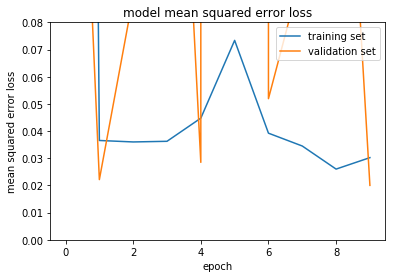

In [23]:
history_dir = os.path.join("logs", "inception_v3")
bch.plot_run_files(False, history_dir)

### Choosing Parameters

Given the results above I have chosen the following parameters to use for the final model.

Using the Left/Right/Center images with a correction of 0.25 helped in almost every run.

Augmenting the data with horizontally flipped images consistently helped the car drive.

Converting to grayscale or yuv, cropping, or resizing the image did not provide a reliable improvement, so I disabled those functions to simplify the model.

### Choosing The Model

Based on all of the plots above, I have selected the `nvidia_lrelu` model. This model seemed to do the best job generalizing - in all the runs train & validation loss remained much closer than other models.

It also had lower average loss than the other models.

This is simply the model as defined in the Nvidia paper with a Leaky ReLU activation at each layer.

In [24]:
final_model = "nvidia_lrelu"

'''
lrelu = LeakyReLU(alpha=0.3)
# Define  model
model.add(Conv2D(3, kernel_size=(5, 5), strides=(2,2), activation=None))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(24, kernel_size=(5, 5), strides=(2,2), activation=None))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(36, kernel_size=(5, 5), strides=(2,2), activation=None))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(48, kernel_size=(3, 3), activation=None))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(64, kernel_size=(3, 3), activation=None))
model.add(LeakyReLU(alpha=0.3))
model.add(Flatten())
model.add(Dense(100, activation=None))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(50, activation=None))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(10, activation=None))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1)) # Output should be in range [-1, 1]

# Minimize with MSE as a basic start for the regression model
model.compile(optimizer='adam', loss=losses.mean_squared_error,
        metrics=['accuracy'])
'''

"\nlrelu = LeakyReLU(alpha=0.3)\n# Define  model\nmodel.add(Conv2D(3, kernel_size=(5, 5), strides=(2,2), activation=None))\nmodel.add(LeakyReLU(alpha=0.3))\nmodel.add(Conv2D(24, kernel_size=(5, 5), strides=(2,2), activation=None))\nmodel.add(LeakyReLU(alpha=0.3))\nmodel.add(Conv2D(36, kernel_size=(5, 5), strides=(2,2), activation=None))\nmodel.add(LeakyReLU(alpha=0.3))\nmodel.add(Conv2D(48, kernel_size=(3, 3), activation=None))\nmodel.add(LeakyReLU(alpha=0.3))\nmodel.add(Conv2D(64, kernel_size=(3, 3), activation=None))\nmodel.add(LeakyReLU(alpha=0.3))\nmodel.add(Flatten())\nmodel.add(Dense(100, activation=None))\nmodel.add(LeakyReLU(alpha=0.3))\nmodel.add(Dense(50, activation=None))\nmodel.add(LeakyReLU(alpha=0.3))\nmodel.add(Dense(10, activation=None))\nmodel.add(LeakyReLU(alpha=0.3))\nmodel.add(Dense(1)) # Output should be in range [-1, 1]\n\n# Minimize with MSE as a basic start for the regression model\nmodel.compile(optimizer='adam', loss=losses.mean_squared_error,\n        metrics

### Choosing The Data
To make things generalize best I decided to use all the data. The different datasets caused slightly different behavior that should all be beneficial to a final model.

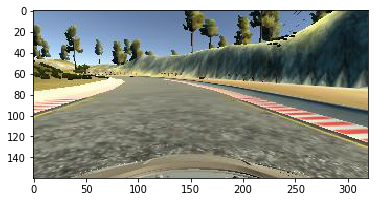

In [25]:
final_data = False # This tells the library to use all CSV files located in ./data/csv
img = mpimg.imread(os.path.join("data", "sample", "sample.jpg"))
plt.imshow(img)

### Training Some More Parameters
Now that I have chosen the datasets to use and the model to use, I choose a few more parameters to fine tune, these included the validation size (previous runs were all 20% validation data) and batch size.

Again I have commented the actual training out and explore the results below.

In [26]:
# bch.hypertune_model("final_tuning.p", final_model, False, False, csv_file_names = final_data)

In [27]:
tuning_results_files = []
history_dir = os.path.join("logs", "final_tuning")
results_pickle_file =  os.path.join(history_dir, final_model + ".p")
bch.plot_run_files(results_pickle_file, history_dir)
results = bch.display_sorted_results([results_pickle_file]) # sorted results from first round
print(results[0:5])

Did not find any results files for nvidia_lrelu-7*.p
Parsing logs\final_tuning\nvidia_lrelu.p with 9 entries
[(-1, -1, 7, {'all_images': True, 'model': 'nvidia_lrelu', 'csv_file_names': ['good-big-t1.csv', 'good-big-t1_flip.csv', 'mouse-t1.csv', 'mouse-t1_flip.csv', 't1-cautious.csv', 't1-cautious_flip.csv', 't1-rcv.csv', 't1-rcv_flip.csv', 't1-rev-cautious.csv', 't1-rev-cautious_flip.csv', 't1-rev.csv', 't1-rev_flip.csv', 't1.csv', 't1_flip.csv', 't2.csv', 't2_flip.csv', 'test-data.csv', 'test-data_flip.csv'], 'resize_shape': (200, 66), 'gray': False, 'epochs': 20, 'yuv': False, 'validation': 0.2, 'preprocess': {'yuv': False, 'blur': False}, 'save_history': True, 'crop': False, 'batch': 512, 'show_history': False, 'correction': [0, 0.25, -0.25], 'resize': False, 'data_csv_list': ['data\\csv\\good-big-t1.csv', 'data\\csv\\good-big-t1_flip.csv', 'data\\csv\\mouse-t1.csv', 'data\\csv\\mouse-t1_flip.csv', 'data\\csv\\t1-cautious.csv', 'data\\csv\\t1-cautious_flip.csv', 'data\\csv\\t1-rcv.

## Tuning Results

I decided on a batch_size of 256 and a validation size of 0.33.

However, there was a problem. None of the models made it around track 2 and the although the models could make it around the track, they often turned down the dirt road after the bridge on track 1. 

I tried a few things to fix the dirt road issue. I tried repeating the experiment with dropout layers added to the model and I also tried adding another convolutional layer to the model. I kept seeing the same problem.

I decided to fix the problem by adding more data. I went back to the simulator and recorded myself driving around the problematic turn four times. After re-training my model everything looked great.

## Final Training

I ran the final model for 50 epochs of training.

In [28]:
# history_dir = os.path.join("logs", "final_model")
# results_pickle_file = os.path.join(history_dir, final_model + ".p")
# bch.plot_run_files(results_pickle_file, history_dir)

## Results

In [29]:
video_file = os.path.join("logs", "final_model", "final_model.mp4")

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_file))

## Final Thoughts

One of the tricky parts of this assignment was creating a method to test the accuracy of the model. In my approach to solving this problem I attempted to automate as much of the process as possible. I automated the model selection, data selection, and paremeter selection. However, this was all heavily dependant on the Loss function I chose; there were several cases where the model that scored better visually performed worse at driving a car than models that scored much worse. If I were to do further work on this assignment I would consider investigating better methods to judge the correctness of a model.

It was also interesting to see how little an affect some changes made, while other changes had a very large effect on model performance. This pertained to modifications to the model, as well as image manipulation and augmentation.

If I had a bit more time I would like to go back and get Track 2 working perfectly. I only recorded 2 or 3 runs around that track, and I'm sure that more data would result in a more accurate model. However, I did this for track 1 to solve the dirt road problem, and this is another subject I would like to study more. I solved the problem by adding more data. While that is a common and sometimes very reasonable approach; I am sure that with more tuning, modeling, and training I could have overcome that hurdle without the 'costly act' of obtaining more data.

The final data used is located in ./data/
The final model used is located in ./models/final_model/